In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load crop data from Github
crop_file_path = r"https://raw.githubusercontent.com/AaronL0111/Data-Analysis-on-Relationship-between-Alberta-Crop-Production-and-Weather/main/Source%20Data/crop_data.csv"

# Load weather data from Github
weather_file_path = r"https://raw.githubusercontent.com/AaronL0111/Data-Analysis-on-Relationship-between-Alberta-Crop-Production-and-Weather/main/Source%20Data/calgary%202013-01-01%20to%202022-12-31.csv"

# Start analysis with the crop data. Read the crop Excel file into a pandas DataFrame
crop_df = pd.read_csv(crop_file_path, index_col=0)

# Starting with data cleaning
# Extract the row corresponding to "Crop Total"
crop_total_row = crop_df.loc["Crop Total"]

# Extract years from column names
crop_years = [col.split()[0] for col in crop_total_row.index if col.split()[0].isdigit()]

# Initialize lists to store data for Harvested Area, Yield, Production, and Seeded Area
seeded_area_data = []
harvested_area_data = []
yield_data = []
production_data = []

# Extract data for each year for crop data
for year in crop_years:
    seeded_area_data.append(crop_total_row[f"{year} Seeded Area (000 ha)"])
    harvested_area_data.append(crop_total_row[f"{year} Harvested Area (000 ha)"])
    yield_data.append(crop_total_row[f"{year} Yield (t/ha)"])
    production_data.append(crop_total_row[f"{year} Production (000 t)"])

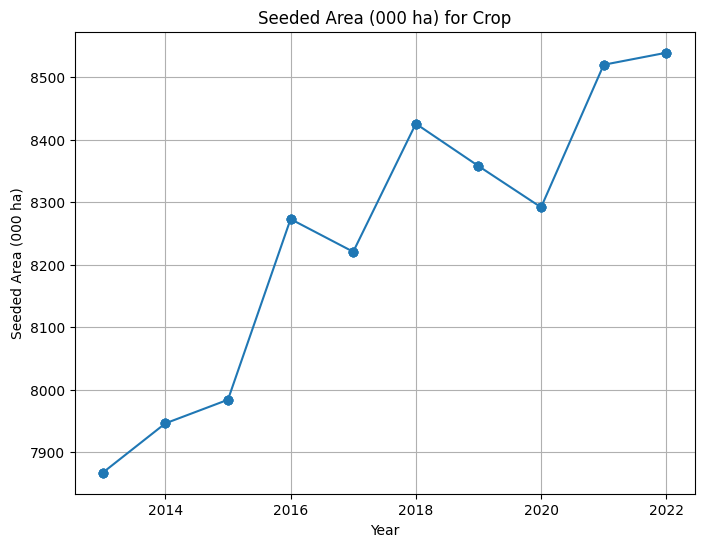

We can see the seeded area increases steadily over years


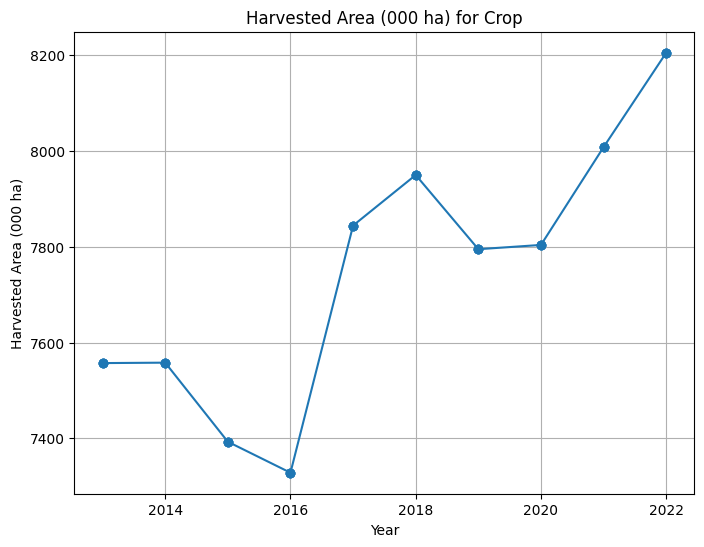

We can see the harvested area increases steadily over years too


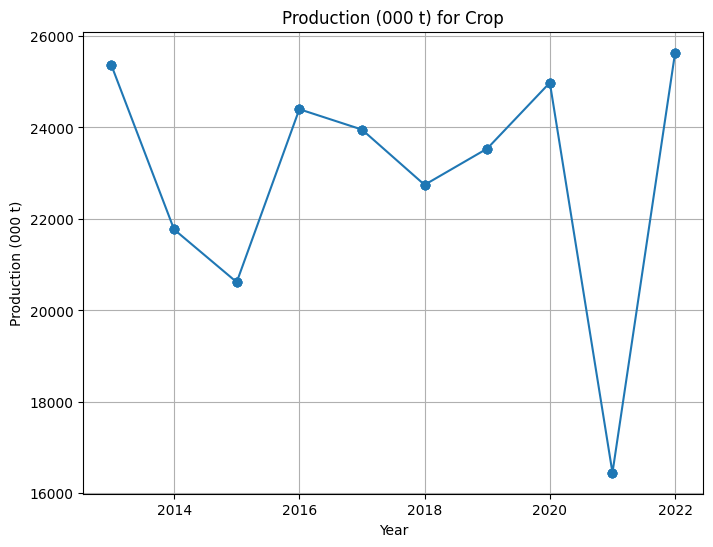

However, production has a trend of decreasing over the years, and it has a significant low number in the year of 2021


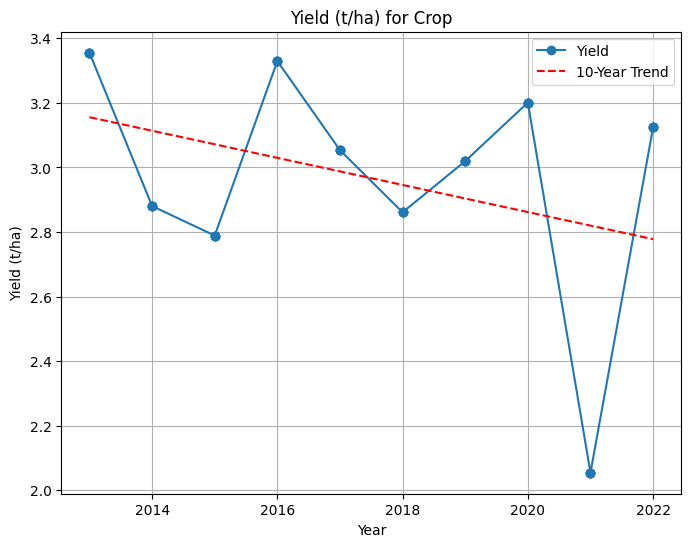

Yield has a similar trend as the production, that it is decreasing over the years, and it has a significant low number in the year of 2021 too


In [8]:
# Visualize the data with graphs
# Plot Seeded Area trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, seeded_area_data, marker='o', linestyle='-')
plt.title("Seeded Area (000 ha) for Crop")
plt.xlabel("Year")
plt.ylabel("Seeded Area (000 ha)")
plt.grid(True)
plt.show()

print ("We can see the seeded area increases steadily over years")

# Plot Harvested Area trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, harvested_area_data, marker='o', linestyle='-')
plt.title("Harvested Area (000 ha) for Crop")
plt.xlabel("Year")
plt.ylabel("Harvested Area (000 ha)")
plt.grid(True)
plt.show()


print ("We can see the harvested area increases steadily over years too")

# Plot Production trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, production_data, marker='o', linestyle='-')
plt.title("Production (000 t) for Crop")
plt.xlabel("Year")
plt.ylabel("Production (000 t)")
plt.grid(True)
plt.show()

print ("However, production has a trend of decreasing over the years, and it has a significant low number in the year of 2021")

# Convert crop_years to integers
crop_years = [int(year) for year in crop_years]

# Plot Yield trend for crop data
plt.figure(figsize=(8, 6))
plt.plot(crop_years, yield_data, marker='o', linestyle='-', label='Yield')
plt.title("Yield (t/ha) for Crop")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.grid(True)

# Calculate trend line for 10-year data
z = np.polyfit(crop_years, yield_data, 1)
p = np.poly1d(z)
plt.plot(crop_years, p(crop_years), color='red', linestyle='--', label='10-Year Trend')

plt.legend()
plt.show()

print ("Yield has a similar trend as the production, that it is decreasing over the years, and it has a significant low number in the year of 2021 too")

icon
rain                 1786
partly-cloudy-day    1096
snow                  680
clear-day              56
cloudy                 27
wind                    7
Name: count, dtype: int64


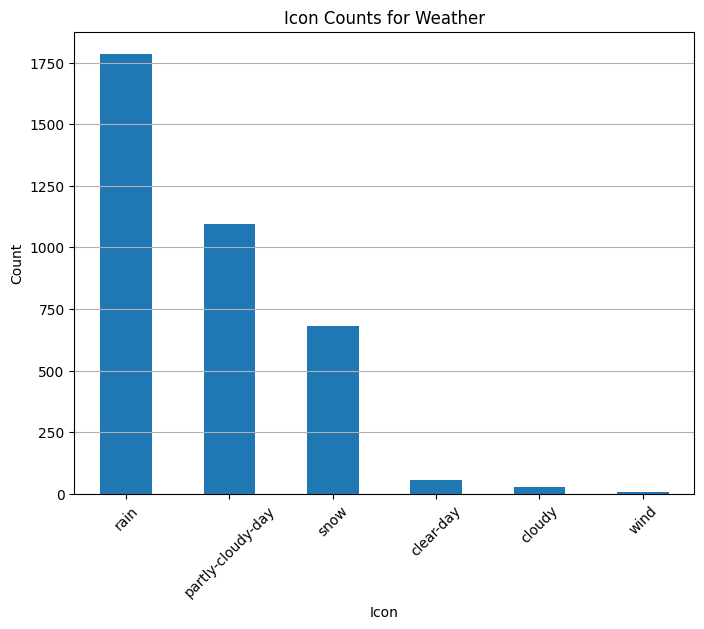

From the icon counts we can have a breif overview of the weather in Alberta, which is mostly raining and cloudy


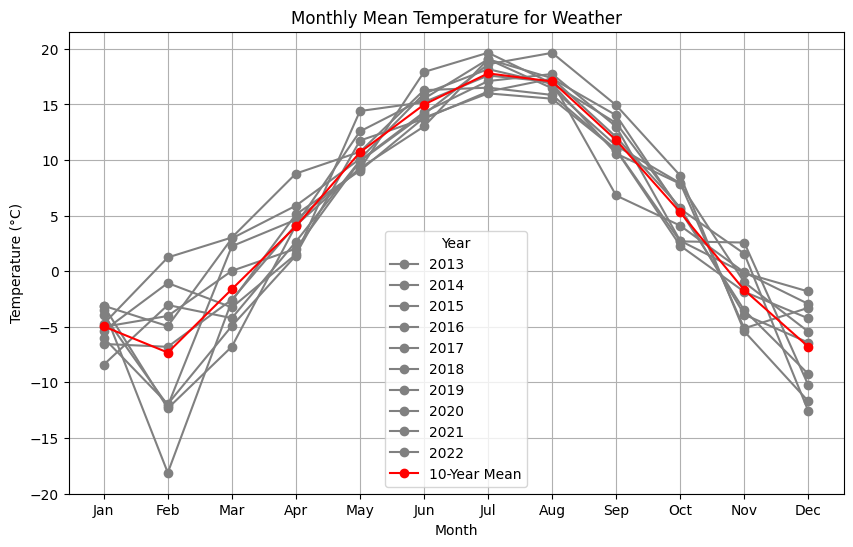

From the average temperature of each month, we can see the Alberta is for sure not a place that is considered warm. There are five months having average temperature under 0 degree.


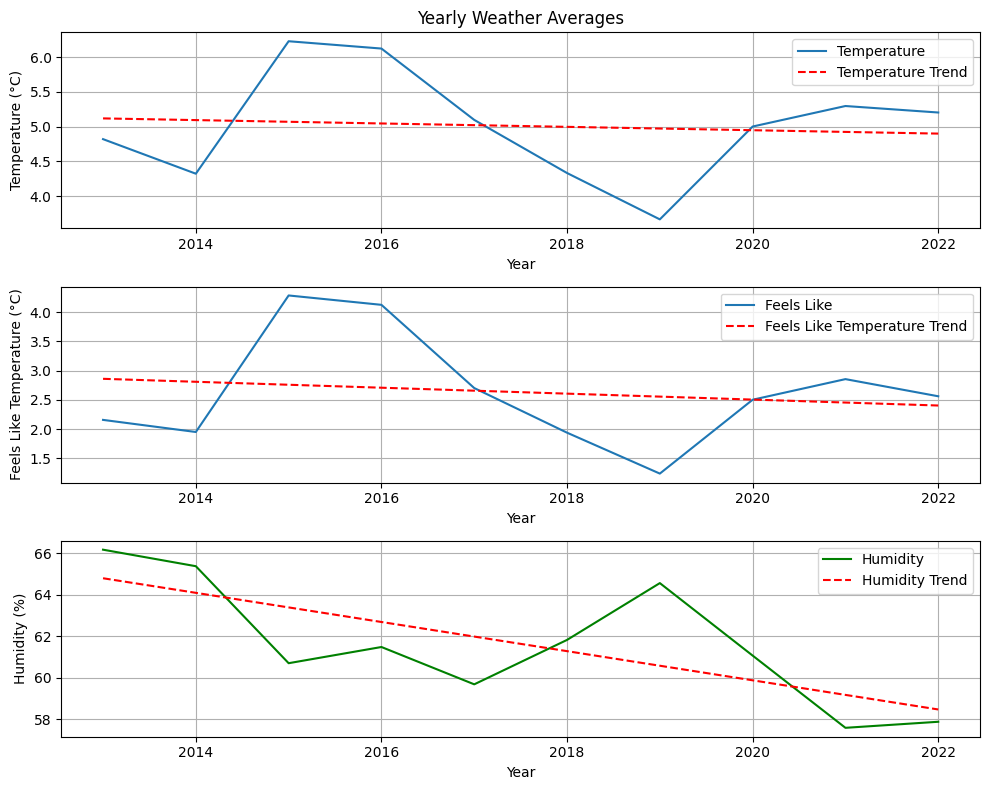

Interestingly, the temperature in Alberta actually goes colder each year dispite the earth is getting hotter.


In [9]:
# Start to analyze the weather data
# Read the weather CSV file into a pandas DataFrame with "datetime" as the index
weather_df = pd.read_csv(weather_file_path, index_col="datetime")

# Drop the first column to clean up the data
weather_df = weather_df.drop(columns=weather_df.columns[0])

# Count the number of occurrences of each value in the "icon" column for weather data
icon_counts = weather_df['icon'].value_counts()

# Display the counts for weather data
print(icon_counts)

# Plot icon counts for weather data
plt.figure(figsize=(8, 6))
icon_counts.plot(kind='bar')
plt.title('Icon Counts for Weather')
plt.xlabel('Icon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print ("From the icon counts we can have a breif overview of the weather in Alberta, which is mostly raining and cloudy")
# Extract the "temp" column for weather data
temp_series = weather_df["temp"]

# Convert the index to datetime if it's not already for weather data
temp_series.index = pd.to_datetime(temp_series.index)

# Group by month and year, then calculate the mean temperature for weather data
monthly_mean_temp = temp_series.groupby([temp_series.index.month, temp_series.index.year]).mean()

# Unstack the multi-index to have years as columns and months as rows for weather data
monthly_mean_temp = monthly_mean_temp.unstack()

# Calculate the mean temperature across all years for each month for weather data
mean_temp_across_years = monthly_mean_temp.mean(axis=1)

# Create a figure and axis object for weather data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly mean temperatures for weather data
monthly_mean_temp.plot(ax=ax, marker='o', linestyle='-', color='grey')  # Set color to blue for yearly averages
mean_temp_across_years.plot(ax=ax, marker='o', linestyle='-', color='red', label='10-Year Mean')  # Set color to red for the 10-year mean

# Customize the plot for weather data
ax.set_title('Monthly Mean Temperature for Weather')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(True)
ax.legend(title='Year')

# Show the plot for weather data
plt.show()

print ("From the average temperature of each month, we can see the Alberta is for sure not a place that is considered warm. There are five months having average temperature under 0 degree")

# Create a new DataFrame with selected columns for weather data
weather_new_df = weather_df[["temp", "feelslike", "humidity"]].copy()

# Convert the index to datetime if it's not already for weather data
weather_new_df.index = pd.to_datetime(weather_new_df.index)

# Group by year and calculate the mean for weather data
yearly_avg_weather_df = weather_new_df.groupby(weather_new_df.index.year).mean()

# Rename the index to 'Year' for weather data
yearly_avg_weather_df.index.name = 'Year'

# Plot temperature and feels like for weather data
plt.figure(figsize=(10, 8))

# Plot temperature
plt.subplot(3, 1, 1)
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['temp'], label='Temperature')
plt.title('Yearly Weather Averages')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Calculate and plot trend line for temperature
temp_years = np.array(yearly_avg_weather_df.index).reshape(-1, 1)
temp_model = LinearRegression().fit(temp_years, yearly_avg_weather_df['temp'])
temp_trend = temp_model.predict(temp_years)
plt.plot(yearly_avg_weather_df.index, temp_trend, color='red', linestyle='--', label='Temperature Trend')
plt.legend()

# Plot feels like temperature
plt.subplot(3, 1, 2)
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['feelslike'], label='Feels Like')
plt.xlabel('Year')
plt.ylabel('Feels Like Temperature (°C)')
plt.legend()
plt.grid(True)

# Calculate and plot trend line for feels like temperature
feelslike_model = LinearRegression().fit(temp_years, yearly_avg_weather_df['feelslike'])
feelslike_trend = feelslike_model.predict(temp_years)
plt.plot(yearly_avg_weather_df.index, feelslike_trend, color='red', linestyle='--', label='Feels Like Temperature Trend')
plt.legend()

# Plot humidity
plt.subplot(3, 1, 3)
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['humidity'], label='Humidity', color='green')
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)

# Calculate and plot trend line for humidity
humidity_model = LinearRegression().fit(temp_years, yearly_avg_weather_df['humidity'])
humidity_trend = humidity_model.predict(temp_years)
plt.plot(yearly_avg_weather_df.index, humidity_trend, color='red', linestyle='--', label='Humidity Trend')
plt.legend()

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

print ("Interestingly, the temperature in Alberta actually goes colder each year dispite the earth is getting hotter")

From the temperature and humidity graph, it looks like these two have a inverse proportional relationship
Assuming they have a relationship temperature * humidity = y, let's find out what y equals to


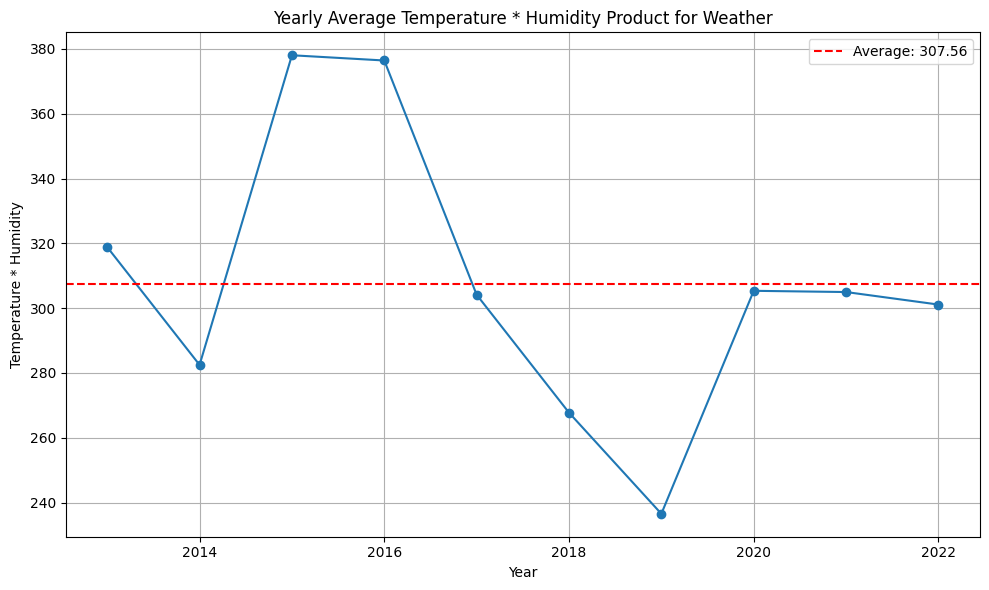

Not a strong dedication but it seems like the relationship somewhat exists as the y value does not vary a lot


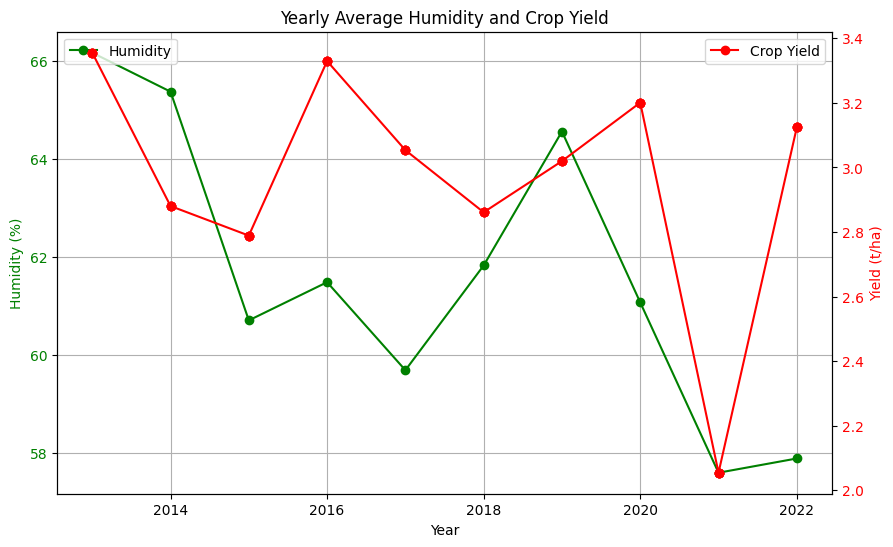

The graph verifies the strong direct proportional relationship between crop yield and humidity


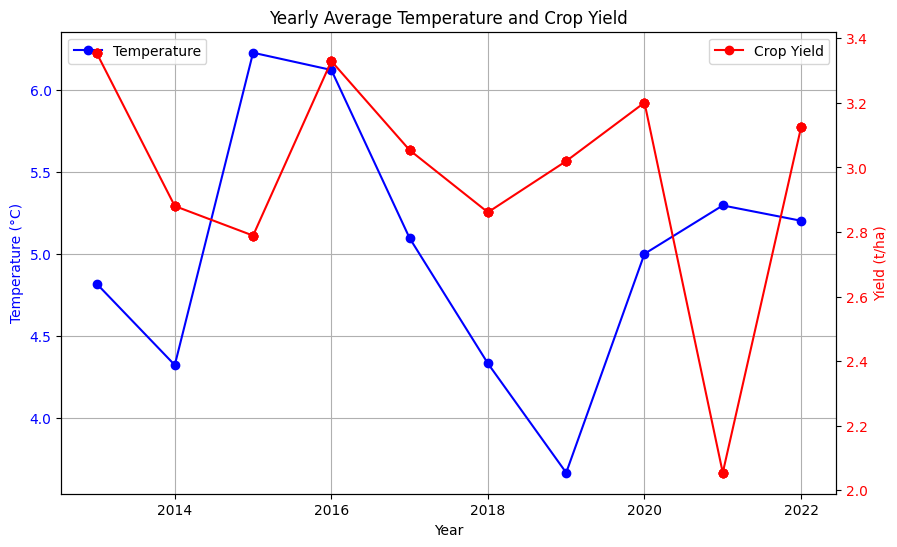

It seems to have a direct proportional relationship between crop yield and humidity, but not strong


In [11]:
# Analyzing the data bewteen weather and crop
# Calculate the product of temperature and humidity for each year for weather data

print ("From the temperature and humidity graph, it looks like these two have a inverse proportional relationship")
print ("Assuming they have a relationship temperature * humidity = y, let's find out what y equals to")

yearly_avg_weather_df['temp_humidity_product'] = yearly_avg_weather_df['temp'] * yearly_avg_weather_df['humidity']

# Plot the relationship between temperature and humidity for weather data
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['temp_humidity_product'], marker='o', linestyle='-')
plt.title('Yearly Average Temperature * Humidity Product for Weather')
plt.xlabel('Year')
plt.ylabel('Temperature * Humidity')
plt.grid(True)

# Calculate the average of temp_humidity_product for weather data
average_temp_humidity_product = yearly_avg_weather_df['temp_humidity_product'].mean()

# Add a horizontal line at the average value for weather data
plt.axhline(y=average_temp_humidity_product, color='r', linestyle='--', label=f'Average: {average_temp_humidity_product:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print ("Not a strong dedication but it seems like the relationship somewhat exists as the y value does not vary a lot")

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot humidity
ax1.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['humidity'], color='green', marker='o', linestyle='-', label='Humidity')

# Set the y-axis label for humidity
ax1.set_ylabel('Humidity (%)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create another y-axis for crop yield
ax2 = ax1.twinx()
ax2.plot(crop_years, yield_data, color='red', marker='o', linestyle='-', label='Crop Yield')
ax2.set_ylabel('Yield (t/ha)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set titles and legend
ax1.set_title('Yearly Average Humidity and Crop Yield')
ax1.set_xlabel('Year')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

print ("The graph verifies the strong direct proportional relationship between crop yield and humidity")

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot temperature
ax1.plot(yearly_avg_weather_df.index, yearly_avg_weather_df['temp'], color='blue', marker='o', linestyle='-', label='Temperature')

# Set the y-axis label for temperature
ax1.set_ylabel('Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create another y-axis for crop yield
ax2 = ax1.twinx()
ax2.plot(crop_years, yield_data, color='red', marker='o', linestyle='-', label='Crop Yield')
ax2.set_ylabel('Yield (t/ha)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set titles and legend
ax1.set_title('Yearly Average Temperature and Crop Yield')
ax1.set_xlabel('Year')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

print ("It seems to have a direct proportional relationship between crop yield and humidity, but not strong")

In [12]:
# Let's investigate into the relationship between crop yield, temperature and humidity

print ("Assuming there is a simple relationship between crop yield, temperature and humidity, that crop yield = temperature * a + humidity * b")

# Create a dictionary to store unique values of crop_years and yield_data
unique_data = {}

# Store unique values of crop_years
for i, year in enumerate(crop_years):
    if year not in unique_data:
        unique_data[year] = yield_data[i]

# Create a DataFrame with Year, Temperature, Humidity, and Yield
combined_df = pd.DataFrame({
    'Year': list(unique_data.keys()),
    'Temperature': yearly_avg_weather_df['temp'].values,
    'Humidity': yearly_avg_weather_df['humidity'].values,
    'Yield': list(unique_data.values())
})

combined_df

# Create a Linear Regression model
model = LinearRegression()

# Prepare the input features (temperature and humidity) and target variable (crop yield)
X = combined_df[['Temperature', 'Humidity']]
y = combined_df['Yield']

# Fit the model
model.fit(X, y)

# Get the coefficients
a = model.coef_[0]  # coefficient for temperature
b = model.coef_[1]  # coefficient for humidity

# Print the coefficients
print("Coefficient for temperature (a):", a)
print("Coefficient for humidity (b):", b)

Assuming there is a simple relationship between crop yield, temperature and humidity, that crop yield = temperature * a + humidity * b
Coefficient for temperature (a): 0.13708519162097446
Coefficient for humidity (b): 0.07599501581263893


Use the equation to predict future trend.


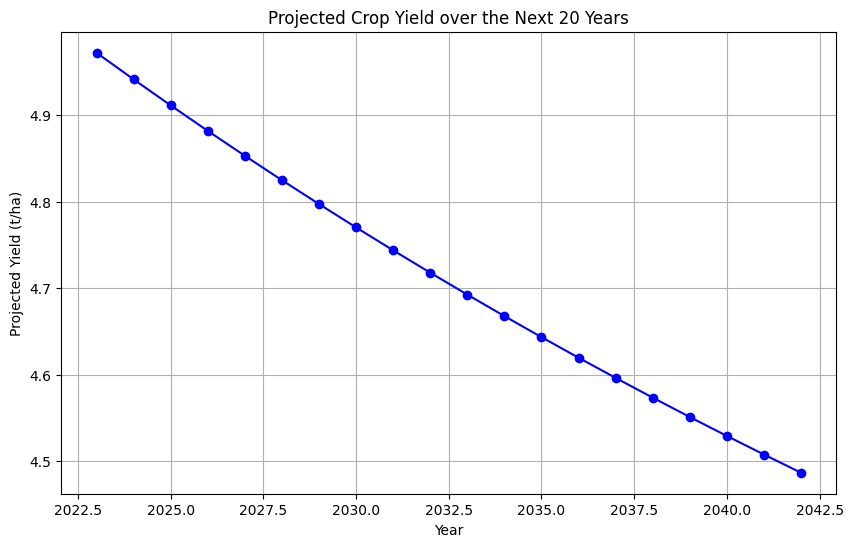

In [13]:
print("Use the equation to predict future trend.")
# Initialize lists to store projected data
future_years = []
future_yields = []

# Initial values
initial_temp = 5.5
initial_humidity = 307.56 / initial_temp  # Humidity calculated based on the given relationship
current_yield = combined_df['Yield'].iloc[-1]  # Last recorded yield

# Future projection for 20 years
for year in range(1, 21):
    future_temp = initial_temp + (0.05 * year)
    future_humidity = 307.56 / future_temp
    
    # Use linear relationship to estimate yield
    future_yield = (0.137 * future_temp + 0.076 * future_humidity)
    
    # Append data to lists
    future_years.append(combined_df['Year'].iloc[-1] + year)
    future_yields.append(future_yield)

# Plot the projected yield over the next 20 years
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_yields, marker='o', linestyle='-', color='blue')
plt.title('Projected Crop Yield over the Next 20 Years')
plt.xlabel('Year')
plt.ylabel('Projected Yield (t/ha)')
plt.grid(True)
plt.show()
